# Setup

## Imports

In [31]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.insert(0, ROOT_DIR)

import alphaconnect.analyze as analyze
import alphaconnect.train as train

/Users/alexliu/GDrive/Projects/Kaggle/alphaconnect/doc/../alphaconnect/train.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Run Directory

In [4]:
RUN_DIR = '../runs/20231108-231322/'

In [5]:
import pprint

pp = pprint.PrettyPrinter().pprint
pp(train.Params.load(RUN_DIR + 'params.json'))

Params(self_play_iterations=10,
       self_play_games=1000,
       sample_queue_size=500000,
       arena_games=100,
       dedupe_samples=True,
       update_agent_threshold=0.5,
       tree_iterations=500,
       cpuct=3,
       temp_change_step=15,
       layers=8,
       filters=128,
       batch_size=1024,
       lr=0.001,
       weight_decay=0.0001,
       processes=8,
       device='cuda',
       seed=42,
       run_dir='runs/20231108-231322')


# Win Rate

In [29]:
df_itr = pd.read_csv(RUN_DIR + 'itr_metrics.csv')
df_itr.head(3)

,iteration,samples,sample_queue,deduped_samples,wins_vs_old,loss_vs_old,wins_vs_mcts,loss_vs_mcts,timestamp
0,1,42774,42774,32765,87,13,41,59,2023-11-09 00:15:11.311777
1,2,43054,85828,63696,33,67,78,22,2023-11-09 01:25:33.339271
2,3,45586,131414,94936,97,3,80,20,2023-11-09 02:47:12.600470


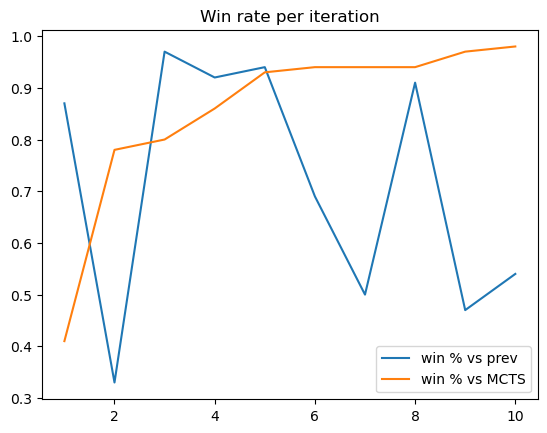

In [53]:
plt.plot(df_itr.iteration, df_itr.wins_vs_old / (df_itr.wins_vs_old + df_itr.loss_vs_old), label="win % vs prev")
plt.plot(df_itr.iteration, df_itr.wins_vs_mcts / (df_itr.wins_vs_mcts + df_itr.loss_vs_mcts), label="win % vs MCTS")
plt.title("Win rate per iteration")
plt.legend()
plt.savefig("win_rate.png")

# Sample Sizes

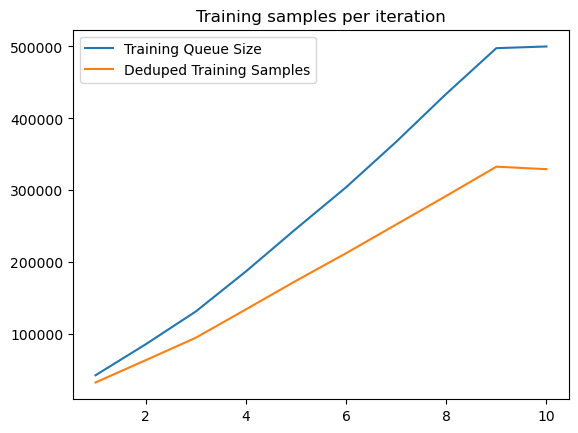

In [54]:
plt.plot(df_itr.iteration, df_itr.sample_queue, label="Training Queue Size")
plt.plot(df_itr.iteration, df_itr.deduped_samples, label="Deduped Training Samples")
plt.title("Training samples per iteration")
plt.legend()
plt.savefig("sample_queue.png")

In [37]:
sample_lengths = []
for f in sorted(glob.glob(RUN_DIR + '/*trajectories*.pkl')):
    sample_lengths.append(len(train.load_trajectories(f)))
sample_lengths

[42774, 43054, 45586, 55670, 59238, 57818, 63214, 66772, 63526, 63876]

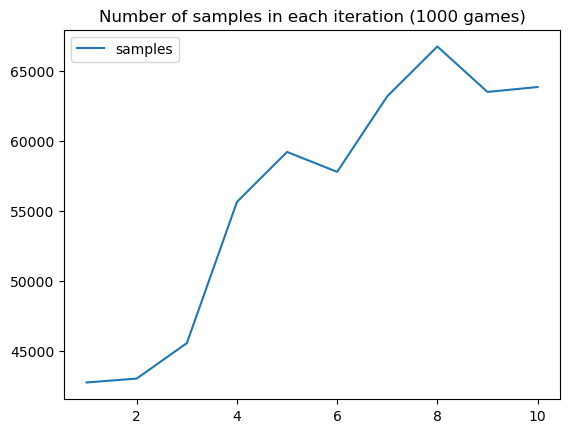

In [55]:
plt.plot(range(1, 11), sample_lengths, label="samples")
plt.title("Number of samples in each iteration (1000 games)")
plt.legend()
plt.savefig("num_samples.png")

# Loss

In [47]:
df_loss = pd.read_csv(RUN_DIR + 'loss.csv')
df_loss.head(3)

,iteration,epoch,value_loss,policy_loss,grad_norm,loss,timestamp
0,1,1,0.882977,2.032326,3.806695,2.915302,2023-11-09 00:04:54.812638
1,1,1,0.910256,1.981207,1.861757,2.891462,2023-11-09 00:04:54.911745
2,1,1,0.842276,1.966844,0.321550,2.809120,2023-11-09 00:04:55.008085


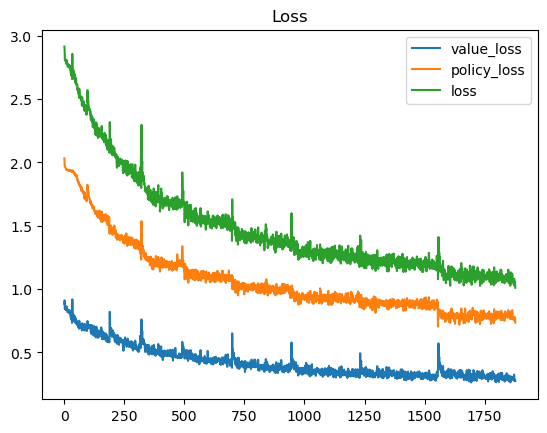

In [56]:
plt.plot(df_loss.index, df_loss.value_loss, label="value_loss")
plt.plot(df_loss.index, df_loss.policy_loss, label="policy_loss")
plt.plot(df_loss.index, df_loss.loss, label="loss")
plt.title("Loss")
plt.legend()
plt.savefig("loss.png")